In [1]:
import sys
sys.path.append("..")
import jax.numpy as jnp
import jax
import jax_dataclasses as jdc

import equinox as eqx

from typing import Callable
from evaluations.data_evaluation import Evaluator,JensenShannonDivergence
from evaluations.utils import valid_space_grid
from evaluations.models import MLP
from evaluations.model_evaluation import ModelEvaluator, PredictionComparison

import matplotlib.pyplot as plt


In [2]:
mlp1=MLP(key=jax.random.PRNGKey(5),layer_sizes=[2,5,5,1])
mlp2=MLP(key=jax.random.PRNGKey(7),layer_sizes=[2,5,5,1])


In [3]:
from evaluations.models import ModelWrapper

In [4]:
class Wrapper(ModelWrapper):
    def __init__(self, model, **kwargs):
        super().__init__(model)

    def gradient(self, obs, action):
        return self.model(jnp.concat([obs,action]))

In [5]:
model_1=Wrapper(mlp1)
model_2=Wrapper(mlp2)

In [6]:
def constr_function(data_point):
    constr1=jax.nn.relu((data_point[0]**2+data_point[1]**2)-1)
    #constr2= jax.nn.relu(0.3-(data_point[0]**2+data_point[1]**2))
    return constr1#+constr2

In [7]:
evaluator=ModelEvaluator(constraint_function=constr_function, gt_model=model_1, obs_dim=1, act_dim=1, validation_points_per_dim=25)

In [11]:
diff_map,metric=evaluator.default_metrics["pred_comp"](model_1,model_1)

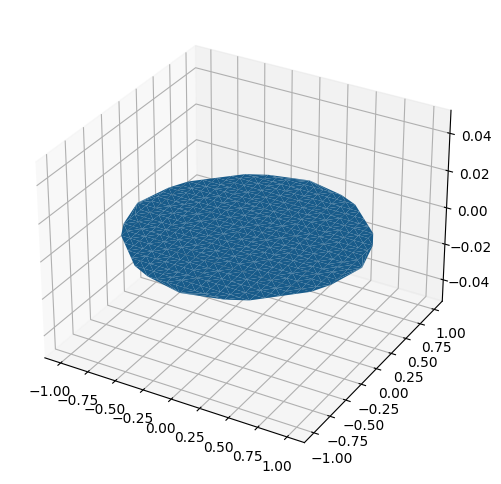

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# data = # your matrix here

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

x = evaluator.constraint_data_space_grid[:, 0]
y = evaluator.constraint_data_space_grid[:, 1]
z = diff_map[:,0]

ax.plot_trisurf(x,y,z)